In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

plt.style.use('ggplot')
%matplotlib inline

### Reading the Data

In [2]:
main_df = pd.read_csv('train.csv')
main_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Splitting into train and test sets

In [3]:
train_df, test_df = train_test_split(main_df, test_size=0.2, random_state=42)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
331,332,0,1,"Partner, Mr. Austen",male,45.5,0,0,113043,28.5000,C124,S
733,734,0,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.0000,NaN,S
382,383,0,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.9250,NaN,S
704,705,0,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,7.8542,NaN,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S


### Handling NaN

In [4]:
print(train_df.isnull().sum())
print(test_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            140
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          553
Embarked         2
dtype: int64
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             37
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          134
Embarked         0
dtype: int64


In [5]:
train_x_df = train_df.interpolate()
train_df.dropna(subset=['Embarked', 'Age'], inplace=True)

test_df = test_df.interpolate()
test_df.dropna(subset=['Embarked', 'Age'], inplace=True)

print(train_df.isnull().sum())
print(test_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          427
Embarked         0
dtype: int64
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          133
Embarked         0
dtype: int64


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Visualizing features

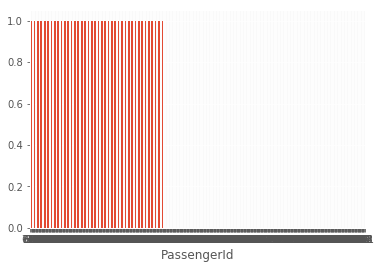

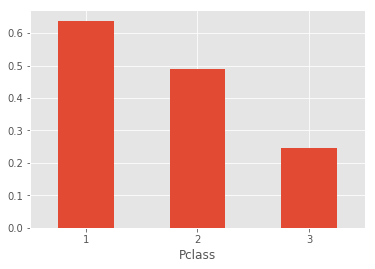

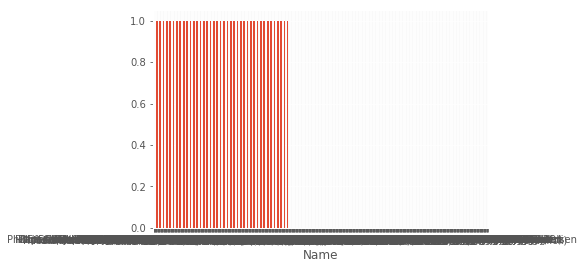

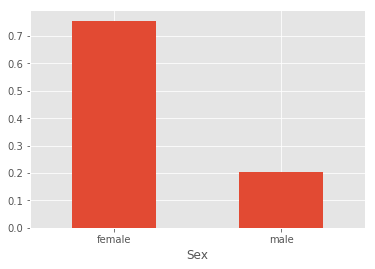

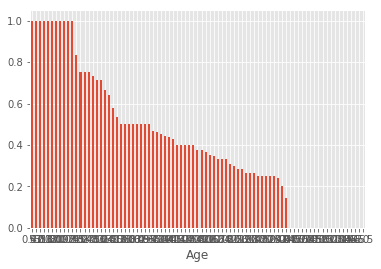

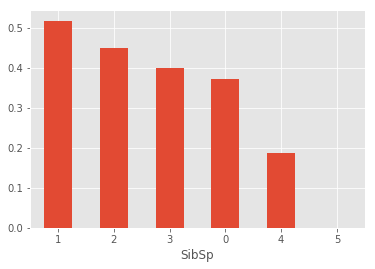

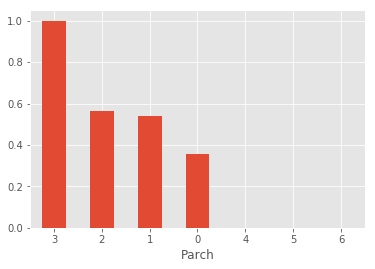

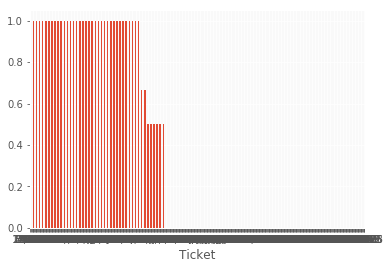

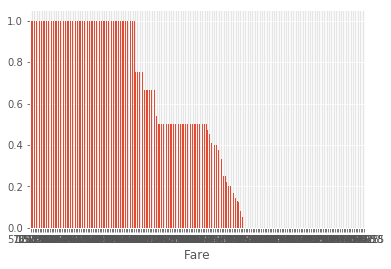

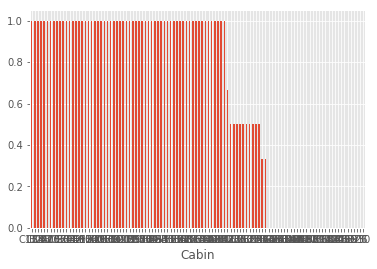

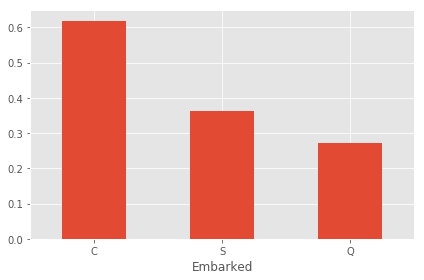

In [6]:
for col in train_df:
    if col != 'Survived':
        temp_df = train_df.pivot_table(index=col, values='Survived', aggfunc='mean')
        temp_df = temp_df.sort_values(by='Survived', ascending=False)
        temp_df.plot(kind='bar', legend=False, rot=0)

plt.tight_layout()
plt.show()

### Correlation

Survived       1.000000
Fare           0.255641
Parch          0.093676
PassengerId    0.058756
SibSp         -0.020228
Age           -0.066188
Pclass        -0.338100
Name: Survived, dtype: float64


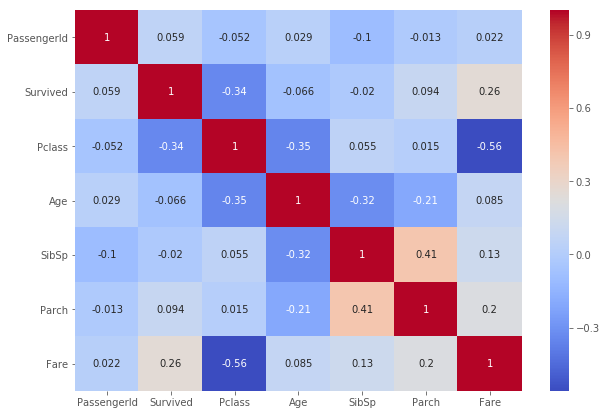

In [7]:
corr = train_df.corr()
fig = plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True, cmap='coolwarm')

print(corr['Survived'].sort_values(ascending=False))

### Selecting Features
Dropping unwanted data, label encoding Sex and Embarked.

In [8]:
train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

gender_dict = {'male': 0, 'female': 1}
embarked_dict = {'C': 0, 'Q': 1, 'S': 2}

train_df.Sex = train_df.Sex.map(gender_dict)
train_df.Embarked = train_df.Embarked.map(embarked_dict)

test_df.Sex = test_df.Sex.map(gender_dict)
test_df.Embarked = test_df.Embarked.map(embarked_dict)


train_df.head()

c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\pandas\core\generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,0,1,0,45.5,0,0,28.5000,2
733,0,2,0,23.0,0,0,13.0000,2
382,0,3,0,32.0,0,0,7.9250,2
704,0,3,0,26.0,1,0,7.8542,2
813,0,3,1,6.0,4,2,31.2750,2


In [9]:
train_x = train_df.drop('Survived', axis=1).values
train_y = train_df['Survived'].values
test_x = test_df.drop('Survived', axis=1).values
test_y = test_df['Survived'].values

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(570, 7)
(570,)
(178, 7)
(178,)


### Logistic Regression

Accuracy: 0.8033707865168539

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       105
           1       0.76      0.75      0.76        73

    accuracy                           0.80       178
   macro avg       0.80      0.80      0.80       178
weighted avg       0.80      0.80      0.80       178



c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


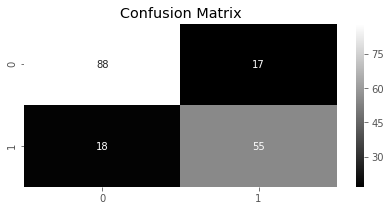

In [11]:
model = LogisticRegression()

model.fit(train_x, train_y)
acc = model.score(test_x, test_y)
pred = model.predict(test_x)

print(f'Accuracy: {acc}\n')

cr = classification_report(test_y, pred)
print(cr)

cm = confusion_matrix(test_y, pred)

fig = plt.figure(figsize=(7, 3))
plt.title('Confusion Matrix')
sns.heatmap(cm, cmap='gray', annot=True)

### Submissions

In [12]:
df1 = pd.read_csv('test.csv')
df1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [13]:
df1.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [14]:
df = df1.interpolate()
print(df.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [15]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

gender_dict = {'male': 0, 'female': 1}
embarked_dict = {'C': 0, 'Q': 1, 'S': 2}

df.Sex = df.Sex.map(gender_dict)
df.Embarked = df.Embarked.map(embarked_dict)

df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,1
1,3,1,47.0,1,0,7.0000,2
2,2,0,62.0,0,0,9.6875,1
3,3,0,27.0,0,0,8.6625,2
4,3,1,22.0,1,1,12.2875,2


In [18]:
X = df.values

pred = model.predict(X)
sub_df = pd.DataFrame()
sub_df['PassengerId'] = df1['PassengerId']
sub_df['Survived'] = pred

sub_df.to_csv('submission.csv', index=False)

sub_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
